Informatics 2 - Foundations of Data Science 

# Maximum likelihood

David Sterratt, 2023-2024

## Maximum likelihood of set of single-variable data

We'll first create some synthetic data, which we will then try to fit a model to using maximum likelihood.

In [1]:
import numpy as np
from scipy.stats import binom
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import uniform
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
%matplotlib widget

In [2]:
y = np.random.normal(size=10)
y

array([-1.26511371, -0.43490978, -0.99848767, -0.9136884 , -0.86357725,
        0.40169569,  0.69230279,  0.90561697,  0.95998038,  0.35097753])

Now imagine that we don't know how this data was generated, but that we make the assumptions that each data point was drawn independently from a normal distribution with mean $\mu$ and variance $\sigma^2$. The likelihood of the data for any value of $\mu$ and $\sigma^2$ is:
$$
\begin{align}
p(\mathbf{Y}= y_1, \dots y_{10}|\mu, \sigma^2) & =  p(Y=y_1 |\mu, \sigma^2) \times \dots \times p(Y=y_{10} |\mu, \sigma^2)\\
& = \frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(y_1 - \mu)^2}{2\sigma^2}\right) \times \dots \times \frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(y_{10} - \mu)^2}{2\sigma^2}\right) 
\end{align}
$$

In [3]:
def normal(y, mu, sigma2):
    return(1/np.sqrt(2*np.pi*sigma2)*np.exp(-0.5*pow(y-mu,2)/sigma2))

def likelihood(y, mu, sigma2):
    p = normal(y[0], mu, sigma2)
    for i in np.arange(1, len(y)):
        p = p * normal(y[i], mu, sigma2)
    return(p)

In [4]:
print(normal(y[0], -0.1, 1))

0.20236475050998998


What happens if we change $\mu$ and $\sigma^2$?

In [5]:
print(likelihood(y, 0, 1))

3.286241821015963e-06


## The likelihood as a function of the parameters $\mu$ and $\sigma^2$

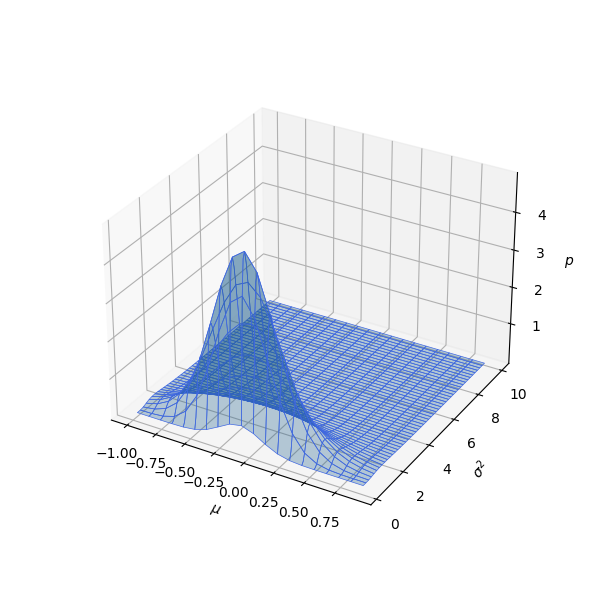

In [6]:
mus, sigmas = np.meshgrid(np.arange(-1, 1, 0.1), np.arange(0.3, 10, 0.1))
ps = likelihood(y, mus, sigmas)

ax = plt.figure(figsize=(6,6)).add_subplot(projection='3d')
ax.plot_surface(mus, sigmas, ps, edgecolor='royalblue', lw=0.5, alpha=0.3)
ax.set(xlabel='$\mu$', ylabel='$\sigma^2$', zlabel='$p$')
plt.show()

## What happens as we increase $n$?

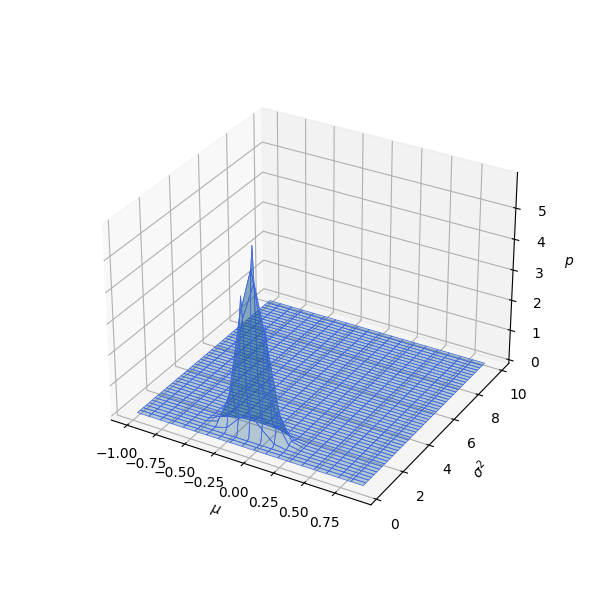

In [62]:
y = np.random.normal(size=100)
ps = likelihood(y, mus, sigmas)

ax = plt.figure(figsize=(6,6)).add_subplot(projection='3d')
ax.plot_surface(mus, sigmas, ps, edgecolor='royalblue', lw=0.5, alpha=0.3)
ax.set(xlabel='$\mu$', ylabel='$\sigma^2$', zlabel='$p$')
plt.show()

Uhhh? Why do we have a flat plot?

In [27]:
print(likelihood(y, 0.1, 2))

0.0


## What if we plot the log Likelihood?

In [31]:
def lognormal(y, mu, sigma2):
    return(-0.5*np.log(2*np.pi*sigma2) -0.5*pow(y-mu,2)/sigma2)

def loglikelihood(y, mu, sigma2):
    logp = lognormal(y[0], mu, sigma2)
    for i in np.arange(1, len(y)):
        logp = logp + lognormal(y[i], mu, sigma2)
    return(logp)

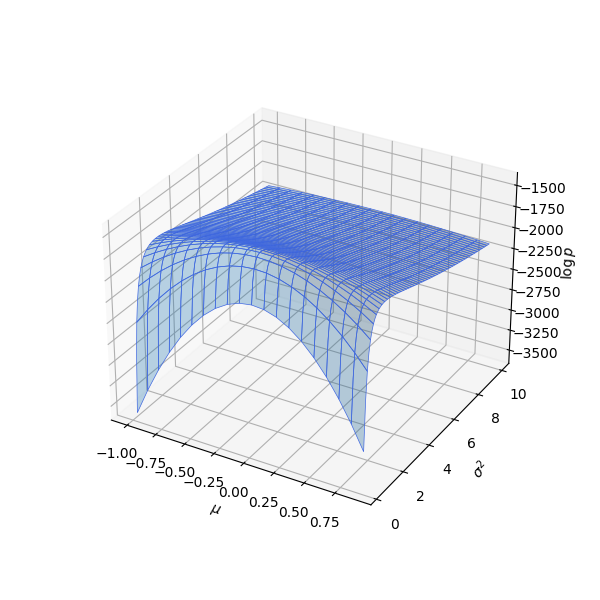

In [36]:
y = np.random.normal(size=1000)

logps = loglikelihood(y, mus, sigmas)

ax = plt.figure(figsize=(6,6)).add_subplot(projection='3d')
ax.plot_surface(mus, sigmas, logps, edgecolor='royalblue', lw=0.5, alpha=0.3)
ax.set(xlabel='$\mu$', ylabel='$\sigma^2$', zlabel='$\log p$')
plt.show()

## Plotting against $\log\sigma^2$

This makes the landscape look smoother

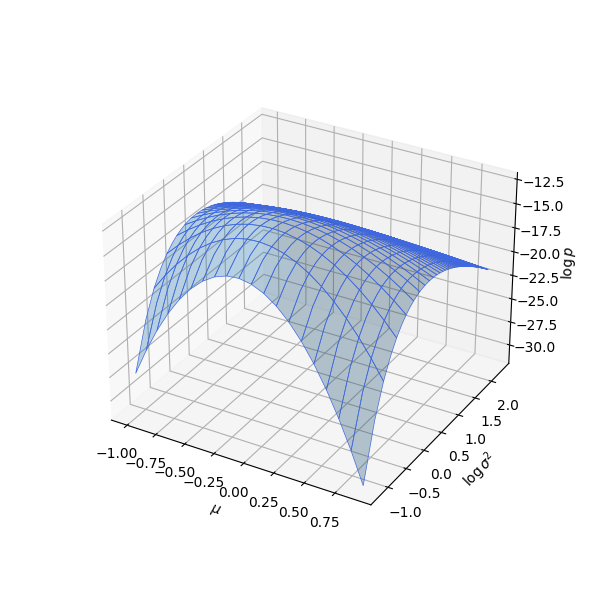

In [9]:
ax = plt.figure(figsize=(6,6)).add_subplot(projection='3d')
ax.plot_surface(mus, np.log(sigmas), logps, edgecolor='royalblue', lw=0.5, alpha=0.3)
ax.set(xlabel='$\mu$', ylabel='$\log \sigma^2$', zlabel='$\log p$')
plt.show()

## What happens as we increase $n$?

In [10]:
y = np.random.normal(size=500)
print(likelihood(y, 0.1, 2))

0.0


# Application of max likelihood to regression



In [38]:
dat = pd.read_csv('squirrel-clean.csv')
dat["Year"].value_counts()
datf = dat[dat['Sex'] == 'F']
datm = dat[dat['Sex'] == 'M']
datf.columns

Index(['Length (mm)', 'Weight (g)', 'Sex', 'Year'], dtype='object')

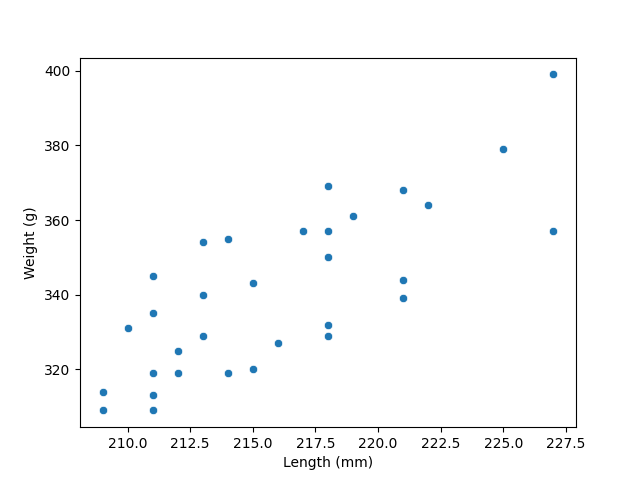

In [39]:
plt.figure()
ax = sns.scatterplot(data=datf, x='Length (mm)', y='Weight (g)')

In [40]:
def loglikelihood_regression(x, y, beta0, beta1, sigma2):
    logp = lognormal(y[0], beta0 + beta1*x[0], sigma2)
    for i in np.arange(1, len(y)):
        logp = logp + lognormal(y[i], beta0 + beta1*x[i], sigma2)
    return(logp)

In [41]:
x = np.array(datf['Length (mm)'])
y = np.array(datf['Weight (g)'])
loglikelihood_regression(x, y, 0, 10, 5)

-10585281.05703966

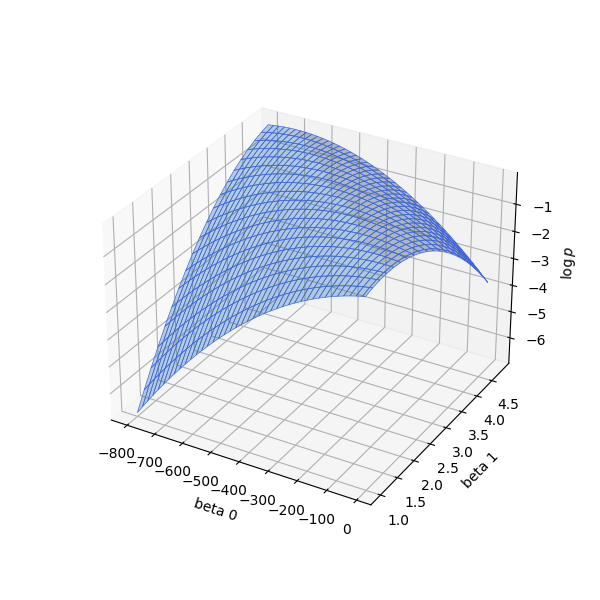

In [43]:
beta0s, beta1s = np.meshgrid(np.arange(-800, 0, 10), np.arange(1, 5, 0.2))
logps = loglikelihood_regression(x, y, beta0s, beta1s, 2.0)

ax = plt.figure(figsize=(6,6)).add_subplot(projection='3d')
ax.plot_surface(beta0s, beta1s, logps, edgecolor='royalblue', lw=0.5, alpha=0.3)
ax.set(xlabel='beta 0', ylabel='beta 1', zlabel='$\log p$')
plt.show()

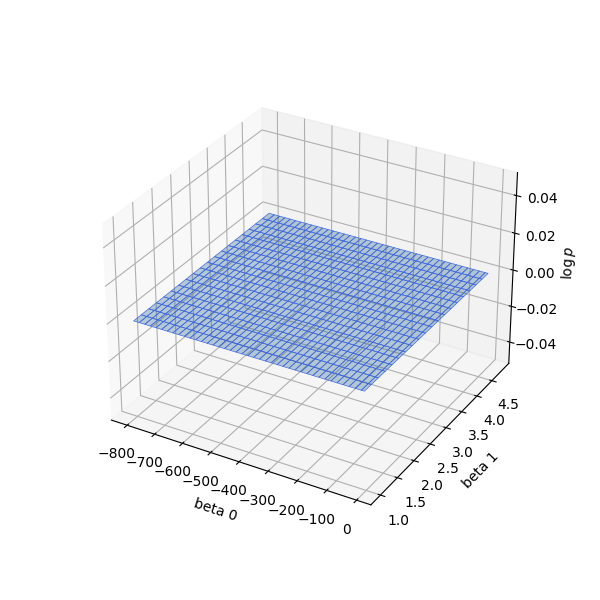

In [16]:
ps = np.exp(logps)

ax = plt.figure(figsize=(6,6)).add_subplot(projection='3d')
ax.plot_surface(beta0s, beta1s, ps, edgecolor='royalblue', lw=0.5, alpha=0.3)
ax.set(xlabel='beta 0', ylabel='beta 1', zlabel='$\log p$')
plt.show()

## Poission distribution

Horsekick data

In [49]:
dat = pd.DataFrame({'k':[0, 1, 2, 3, 4,], 'n':[144, 91, 32, 11, 2]})
dat

k    n
0  0  144
1  1   91
2  2   32
3  3   11
4  4    2

Log likelihood, max likelihood estimate

In [53]:
def array_factorial(k):
    return(np.array([np.math.factorial(int(ki)) for ki in k]))

def loglikelihood_poisson(n, Lambda):
    k = np.arange(len(n))*1.0
    return(np.sum(n*(k*np.log(Lambda) - Lambda - array_factorial(k))))

def mle_poisson(n):
    k = np.arange(len(n))*1.0
    return(np.sum(n*k)/np.sum(n))

def poisson(Lambda, k):
    return(np.power(Lambda, k)*np.exp(-Lambda)/np.math.factorial(k))

In [54]:
mle_poisson(dat['n'])

0.7

In [55]:
Lambda_MLE = loglikelihood_poisson(np.array(dat['n']), 0.7)

In [56]:
Lambda = 1
dat['ppred'] = dat['k'].apply(lambda x: poisson(Lambda, x))
dat['npred'] = dat['ppred']*np.sum(dat['n'])
print(loglikelihood_poisson(np.array(dat['n']), Lambda))
dat

-693.0


k    n     ppred       npred
0  0  144  0.367879  103.006244
1  1   91  0.367879  103.006244
2  2   32  0.183940   51.503122
3  3   11  0.061313   17.167707
4  4    2  0.015328    4.291927

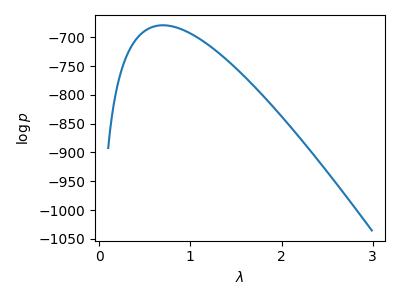

In [57]:
Lambdas = np.arange(0.1, 3, 0.01)
logps_poisson = np.array([loglikelihood_poisson(dat['n'], Lambda) for Lambda in Lambdas])
plt.figure(figsize=(4,3))
plt.plot(Lambdas, logps_poisson)
plt.xlabel('$\lambda$')
plt.ylabel('$\log p$')
plt.tight_layout()
plt.show()

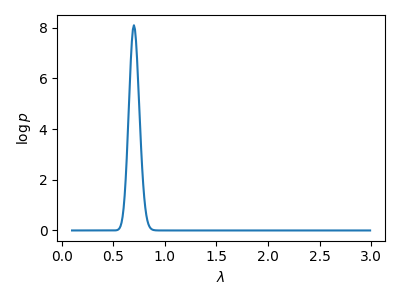

In [59]:
plt.figure(figsize=(4,3))
plt.plot(Lambdas, np.exp(logps_poisson+681))
plt.xlabel('$\lambda$')
plt.ylabel('$\log p$')
plt.tight_layout()
plt.show()

In [60]:
np.sum(np.exp(logps_poisson+681))*0.01

1.01546071646722

In [61]:
np.exp(logps_poisson+300)

array([5.81404049e-258, 4.58584945e-251, 7.11136841e-245, 2.81385333e-239,
       3.47916357e-234, 1.57849089e-229, 2.99121311e-225, 2.63205401e-221,
       1.17406639e-217, 2.85734640e-214, 4.03749231e-211, 3.49292915e-208,
       1.93655083e-205, 7.15838034e-203, 1.82615542e-200, 3.31399243e-198,
       4.39401429e-196, 4.35871515e-194, 3.30377382e-192, 1.94993082e-190,
       9.11492270e-189, 3.42652975e-187, 1.05034922e-185, 2.65855490e-184,
       5.62026260e-183, 1.00276926e-181, 1.52450874e-180, 1.99229267e-179,
       2.25618967e-178, 2.23063801e-177, 1.93865206e-176, 1.49057193e-175,
       1.01989014e-174, 6.24432095e-174, 3.43849158e-173, 1.71108477e-172,
       7.72910639e-172, 3.18236421e-171, 1.19902352e-170, 4.14908482e-170,
       1.32317391e-169, 3.90144999e-169, 1.06684747e-168, 2.71326912e-168,
       6.43538904e-168, 1.42711993e-167, 2.96621124e-167, 5.79156513e-167,
       1.06459990e-166, 1.84616034e-166, 3.02618630e-166, 4.69757473e-166,
       6.91787369e-166, 9